# **Deep Learning**

##**Házi Feladat**


> A fentiekben gyakorolt borminősítéses feladatot alakítsuk át osztályozási feladattá, azaz y-t one hot encodingal alakítsuk át és a hozzátartozó modellt is ennek megfelelően alakítsuk át. Legyen 3 rejtett réteg rétegenként 1024 neuronnal, 30%-os dropouttal, korai megállással. A metrika legyen a pontosság! Értékeljük ki a loss-okat!


---


Barta Levente G41ESH

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

red_wine = pd.read_csv('https://raw.githubusercontent.com/karsarobert/DeepLearning2024/main/red-wine.csv')

y = red_wine.quality
X = red_wine.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale to [0, 1]
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

range = max([y_train.max(),y_test.max()]) + 1 #legnagyobb értékelés meghatározása

y_train = tf.keras.utils.to_categorical(y_train, range) #onehot encoding
y_test = tf.keras.utils.to_categorical(y_test, range)


**Early stopping, Dropout**

---



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)

model = keras.Sequential([

    layers.Dense(1024, activation='relu'), #1024 neuron
    layers.Dropout(0.3),  #30%-os dropout
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(9, activation='softmax'), # 9 kimeneti neuron, ezek száma megegyezik az osztályok(értékelések) számával
])

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - categorical_accuracy: 0.1150 - loss: 2.9392 - val_categorical_accuracy: 0.4594 - val_loss: 2.1670
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - categorical_accuracy: 0.1768 - loss: 2.6160 - val_categorical_accuracy: 0.4219 - val_loss: 2.1361
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - categorical_accuracy: 0.2379 - loss: 2.4418 - val_categorical_accuracy: 0.4344 - val_loss: 2.1073
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - categorical_accuracy: 0.3172 - loss: 2.2891 - val_categorical_accuracy: 0.4406 - val_loss: 2.0817
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - categorical_accuracy: 0.3211 - loss: 2.2340 - val_categorical_accuracy: 0.4938 - val_loss: 2.0523
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - categorical_accuracy: 0.3425 - loss: 2.1948 - val_categorical_accuracy: 0.5219 - val_loss: 2.0248
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - categorical_accuracy: 0.3758 - loss: 2.12

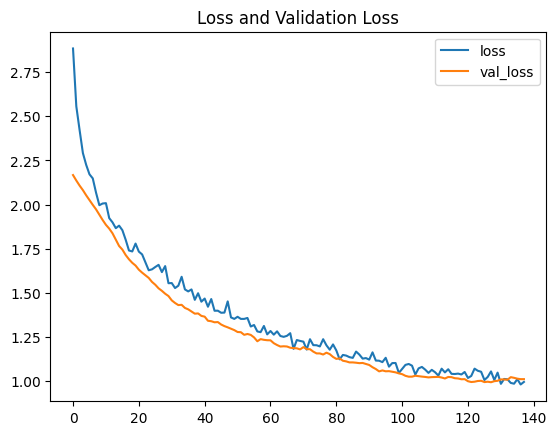

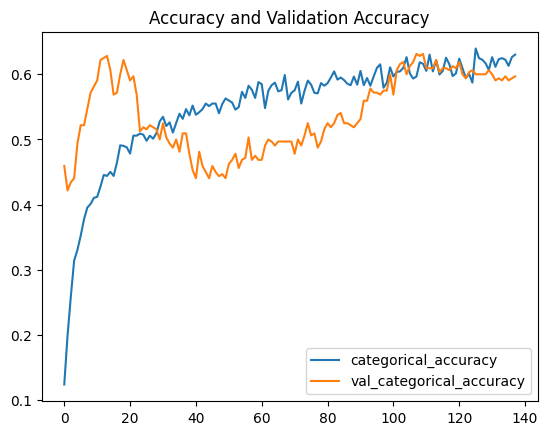

In [ ]:
import matplotlib.pyplot as plt


model.compile(
    optimizer='sgd', #sigmoid függvény
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'] #metrika a valószíűség
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=1,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss and Validation Loss')
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title='Accuracy and Validation Accuracy')
plt.show()